In [1]:
import fasttext
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("imdb.csv")

In [3]:
df["rating"] = df["rating"].astype(str)

<Axes: xlabel='rating'>

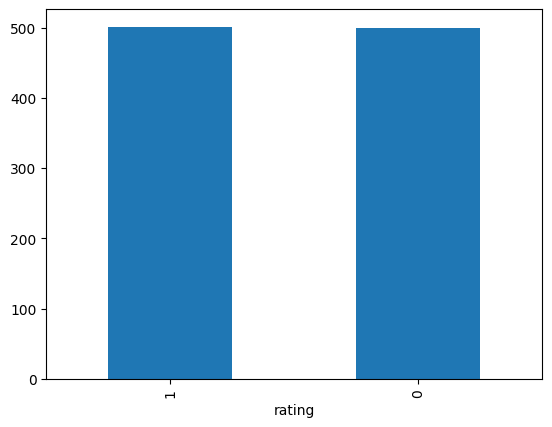

In [4]:
df["rating"].value_counts().plot(kind="bar")

In [5]:
df.head()

,review,rating
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [6]:
df["rating"] = "__label__" + df["rating"]

In [7]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

train_file = "train.txt"
test_file = "test.txt"

train_df[["rating", "review"]].to_csv(train_file, sep="\t", header=None, index=None)
test_df[["rating", "review"]].to_csv(test_file, sep="\t", header=None, index=None)

In [8]:
model = fasttext.train_supervised(input=train_file, epoch=1000, lr=0.05, wordNgrams=2)

Read 0M words
Number of words:  30244
Number of labels: 2
Progress: 100.0% words/sec/thread: 1257702 lr:  0.000000 avg.loss:  0.072503 ETA:   0h 0m 0s 16.1% words/sec/thread: 1322058 lr:  0.041968 avg.loss:  0.395760 ETA:   0h 0m 7s 43.3% words/sec/thread: 1269873 lr:  0.028363 avg.loss:  0.161732 ETA:   0h 0m 5s% words/sec/thread: 1253445 lr:  0.003243 avg.loss:  0.076910 ETA:   0h 0m 0s


In [9]:
results = model.test(test_file)

In [10]:
print(f"Test accuracy: {results[1] * 100:.4}%")

Test accuracy: 81.0%
